# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# Data Collection

In [3]:
diabetes = pd.read_csv(r"diabetes.csv")

NameError: name 'pd' is not defined

# Exploratory Data Analysis

In [14]:
diabetes.shape

(768, 9)

In [15]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Cleaning

In [16]:
#replace zeros beacuse it might affect the outcome
replace_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']
for column in replace_zero:
 diabetes[column] = diabetes[column].replace(0, np.NaN) #replace 0 with no data
 mean = int(diabetes[column].mean(skipna=True)) #find the mean of the column
 diabetes[column] = diabetes[column].replace(np.NaN, mean) #replaces the NaN with mean


Text(0.5, 1.0, 'Diabetes Outcome')

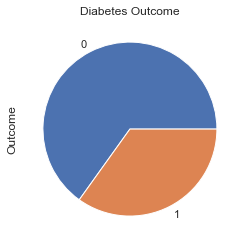

In [17]:
diabetes['Outcome'].value_counts().plot(kind='pie').set_title('Diabetes Outcome')

# Build the Machine Learning Model

In [7]:
#split data
a = diabetes.iloc[:, 0:8]
b = diabetes.iloc[:, 8]
a_train, a_test, b_train, b_test = train_test_split(a, b, random_state=0,test_size=0.2)

In [8]:
#Standardize the data - Feature Scaling
sc_a = StandardScaler()
a_train = sc_a.fit_transform(a_train)
a_test = sc_a.transform(a_test)

In [9]:
#define the model
model=LogisticRegression()
model.fit(a_train,b_train)
b_pred=model.predict(a_test)

In [10]:
pickle.dump(model,open('model.pkl','wb'))

# Evaluate Metrics

In [11]:
print(accuracy_score(b_test, b_pred))
print(f1_score(b_test, b_pred))

0.8116883116883117
0.6588235294117647
